In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('Data/reviews.csv', encoding='ISO-8859-1')
print(df.head())

                                                Text  Sentiment
0  Once again Mr. Costner has dragged out a movie...          0
1  This is an example of why the majority of acti...          0
2  First of all I hate those moronic rappers, who...          0
3  Not even the Beatles could write songs everyon...          0
4  Brass pictures (movies is not a fitting word f...          0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [9]:
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  When i got this movie free from my job, along ...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

In [10]:
df = df.drop_duplicates()
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  Once again Mr. Costner has dragged out a movie...   
1          24884  24884  I went and saw this movie last night after bei...   

                
          freq  
Sentiment       
0            1  
1            1

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

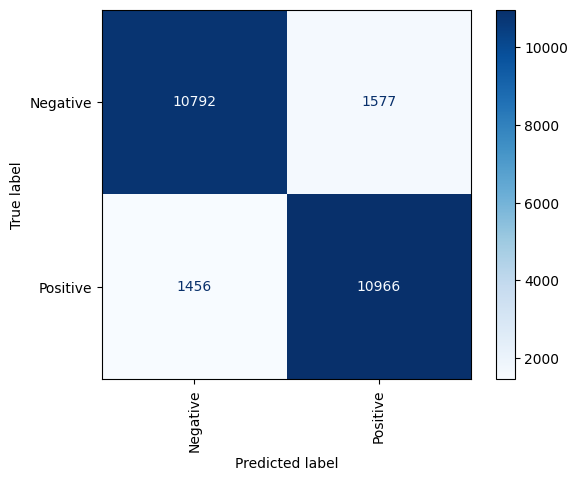

In [14]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test, 
                   display_labels=['Negative', 'Positive'], 
                   cmap='Blues', xticks_rotation='vertical')

In [18]:
text = 'The long lines and poor customer service really turned me off'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.09147294453811612

In [19]:
text = 'The food was great and the service was excellent!'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.8579339139483456

In [21]:
import joblib

joblib.dump(model, 'model/model.pkl')
joblib.dump(vectorizer, 'model/vectorizer.pkl')

['model/vectorizer.pkl']

In [31]:
modelEx = joblib.load('model/model.pkl')
vectorizerEx = joblib.load('model/vectorizer.pkl')

text = 'The food was great and the service was excellent!'

text_vectorized = vectorizerEx.transform([text])
prediction = modelEx.predict(text_vectorized)

print(f"Predicted Sentiment: {prediction[0]}")

Predicted Sentiment: 1
